# Import Libraries

In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn
!pip install textstat
!pip install nltk
!pip install tensorflow-text
!pip install keras-nlp

# pip install --upgrade keras
# !pip install --upgrade tensorflow
# !pip install tensorflow_hub --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 865.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatib

In [2]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from textstat import flesch_reading_ease
import textstat

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score

import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# import tensorflow as tf
#import tensorflow_hub as hub
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('punkt')

import keras_core as keras
import keras_nlp

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


Using TensorFlow backend


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Keras version: 0.1.7
KerasNLP version: 0.11.1


# Loading the dataset

In [4]:
df=pd.read_csv(r'train_v2_drcat_02.csv')

In [5]:
df

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [6]:
df['label'].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

In [7]:
# Creating a new column indicating human or AI
df['source'] = np.where(df['label'] == 0, 'human', 'AI')

In [8]:
df['source'].value_counts()

source
human    27371
AI       17497
Name: count, dtype: int64

**Sampled 3000 essays from each AI and Human Text**

In [9]:
# Select a random sample of 10000 human-generated texts
human_texts = df[df['source'] == 'human'].sample(n=3000, random_state=42)

# Select all AI-generated texts
AI_texts = df[df['source'] == 'AI'].sample(n=3000, random_state=42)

# Concatenate the selected human-generated texts with all AI-generated texts
matched_df = pd.concat([human_texts, AI_texts])

# Shuffle the DataFrame to mix human and AI texts
matched_df = matched_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now matched_df contains an equal number of human and AI generated texts

In [10]:
matched_df['source'].value_counts()

source
human    3000
AI       3000
Name: count, dtype: int64

In [11]:
matched_df

,text,label,prompt_name,source,RDizzl3_seven
0,"Dear TEACHER_NAME,\n\nI think the idea of havi...",0,Community service,human,False
1,"Hey there! So, you wanna know about how havin...",1,Grades for extracurricular activities,AI,False
2,Generic_Name\n\nGeneric_Name\n\nEnglish 8 Hono...,0,Seeking multiple opinions,human,False
3,The school bus doors close with a hiss behind ...,0,Mandatory extracurricular activities,human,False
4,It is no secret that cars have become a staple...,1,Car-free cities,AI,True
...,...,...,...,...,...
5995,I think there defintely shuld be stronger priv...,1,Facial action coding system,AI,True
5996,"Introduction:\n\nThe article ""The Challenge of...",1,Exploring Venus,AI,True
5997,Title: The Power of Positivity: Unlocking Succ...,1,Seeking multiple opinions,AI,False
5998,First impressions are critical in determining...,1,Seeking multiple opinions,AI,False


# Text Preprocessing

In [12]:
from nltk.stem import WordNetLemmatizer
import re

# Initialize WordNet Lemmatizer
wc = WordNetLemmatizer()

# Initialize corpus to store preprocessed reviews
corpus = []

# Preprocess all the data
for i in range(len(matched_df)):
    review = matched_df['text'][i]
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', " ", review)
    # Convert text to lowercase
    review = review.lower()
    # Tokenization
    review = review.split()
    # Applying lemmatization
    d = [wc.lemmatize(word) for word in review]
    review = " ".join(d)
    # Append preprocessed review to corpus
    corpus.append(review)



In [13]:
# corpus

# Feature Engineering

# Code:

In [14]:
# Feature Engineering: Text Length
matched_df['text_length'] = matched_df['text'].apply(lambda x: len(x))

# Feature Engineering: Lexical Diversity
def calculate_lexical_diversity(text):
    tokens = word_tokenize(text.lower())
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens) if len(tokens) > 0 else 0

matched_df['lexical_diversity'] = matched_df['text'].apply(calculate_lexical_diversity)

# Feature Engineering: Readability Metrics
matched_df['flesch_reading_ease'] = matched_df['text'].apply(lambda x: flesch_reading_ease(x))


In [15]:
matched_df['text_length']

0       2634
1       1601
2       2813
3       4621
4       2172
        ... 
5995    3733
5996    2478
5997    1997
5998    1952
5999    1986
Name: text_length, Length: 6000, dtype: int64

In [16]:
matched_df['lexical_diversity']

0       0.384906
1       0.360313
2       0.297597
3       0.337705
4       0.389497
          ...   
5995    0.326174
5996    0.356984
5997    0.493606
5998    0.306878
5999    0.487745
Name: lexical_diversity, Length: 6000, dtype: float64

In [17]:
matched_df['flesch_reading_ease']

0       70.77
1       83.76
2       68.70
3       67.28
4       74.39
        ...  
5995    62.27
5996    48.64
5997    45.25
5998    51.68
5999    77.67
Name: flesch_reading_ease, Length: 6000, dtype: float64

In [18]:
# Creating a new DataFrame with selected columns
new_df = matched_df[['text', 'label', 'source', 'text_length', 'lexical_diversity', 'flesch_reading_ease']]

In [19]:
new_df

,text,label,source,text_length,lexical_diversity,flesch_reading_ease
0,"Dear TEACHER_NAME,\n\nI think the idea of havi...",0,human,2634,0.384906,70.77
1,"Hey there! So, you wanna know about how havin...",1,AI,1601,0.360313,83.76
2,Generic_Name\n\nGeneric_Name\n\nEnglish 8 Hono...,0,human,2813,0.297597,68.70
3,The school bus doors close with a hiss behind ...,0,human,4621,0.337705,67.28
4,It is no secret that cars have become a staple...,1,AI,2172,0.389497,74.39
...,...,...,...,...,...,...
5995,I think there defintely shuld be stronger priv...,1,AI,3733,0.326174,62.27
5996,"Introduction:\n\nThe article ""The Challenge of...",1,AI,2478,0.356984,48.64
5997,Title: The Power of Positivity: Unlocking Succ...,1,AI,1997,0.493606,45.25
5998,First impressions are critical in determining...,1,AI,1952,0.306878,51.68


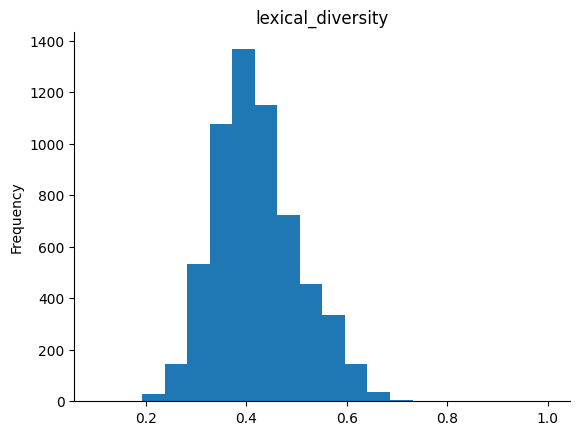

In [20]:
from matplotlib import pyplot as plt
new_df['lexical_diversity'].plot(kind='hist', bins=20, title='lexical_diversity')
plt.gca().spines[['top', 'right',]].set_visible(False)

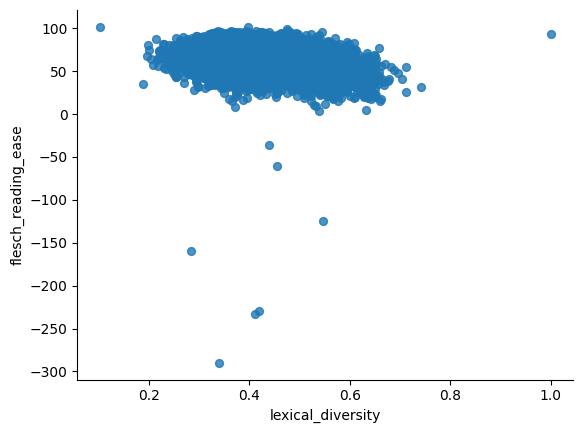

In [21]:
from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='lexical_diversity', y='flesch_reading_ease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

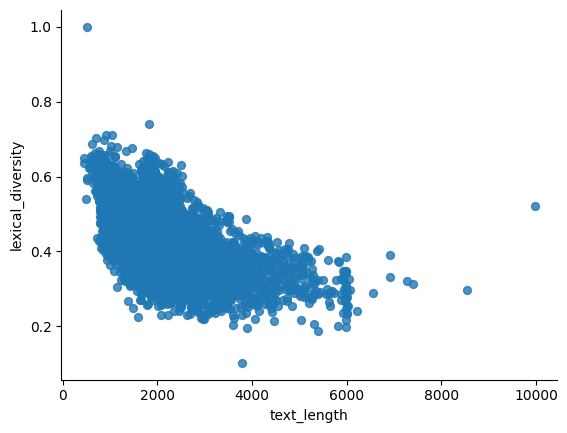

In [22]:
from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='text_length', y='lexical_diversity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-23-6ea9716f665e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


Text(0.5, 1.0, 'Distribution of prompt name')

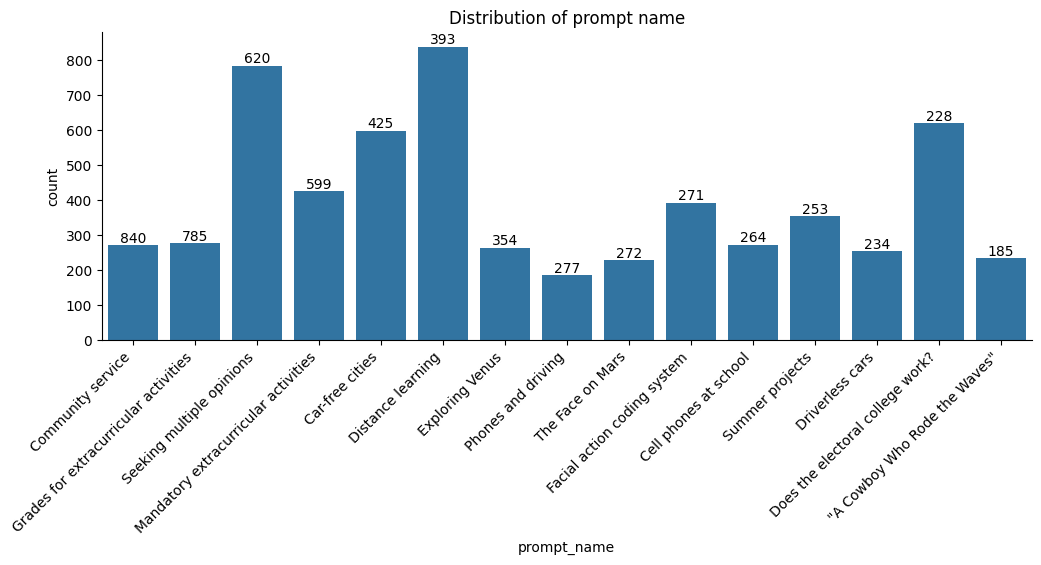

In [23]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=matched_df,
                   x="prompt_name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

abs_values = matched_df['prompt_name'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of prompt name")


Text(0.5, 1.0, 'Distribution of Generated Text')

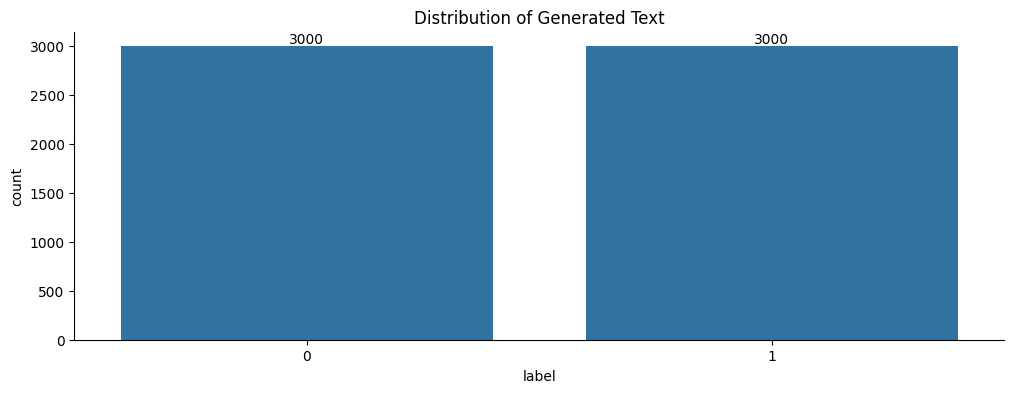

In [24]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=matched_df,
                   x="label")

abs_values = matched_df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

#Understanding source & text_length

In [25]:
# Filtering AI-generated text with lengths less than 500, 1000 and greater than 1000
ai_less_than_1000 = new_df[(new_df['source'] == 'AI') & (new_df['text_length'] < 1000)].shape[0]
ai_less_than_500 = new_df[(new_df['source'] == 'AI') & (new_df['text_length'] < 500)].shape[0]
ai_greater_than_1000 = new_df[(new_df['source'] == 'AI') & (new_df['text_length'] > 1000)].shape[0]

# Filtering human text with lengths less than 500, 1000 and greater than 1000
human_less_than_1000 = new_df[(new_df['source'] == 'human') & (new_df['text_length'] < 1000)].shape[0]
human_less_than_500 = new_df[(new_df['source'] == 'human') & (new_df['text_length'] < 500)].shape[0]
human_greater_than_1000 = new_df[(new_df['source'] == 'human') & (new_df['text_length'] > 1000)].shape[0]

print("AI-generated text with length < 5000:", ai_less_than_500)
print("AI-generated text with length < 10000:", ai_less_than_1000)
print("AI-generated text with length > 10000:", ai_greater_than_1000)

print("Human text with length < 5000:", human_less_than_500)
print("Human text with length < 10000:", human_less_than_1000)
print("Human text with length > 10000:", human_greater_than_1000)

AI-generated text with length < 5000: 3
AI-generated text with length < 10000: 144
AI-generated text with length > 10000: 2856
Human text with length < 5000: 0
Human text with length < 10000: 169
Human text with length > 10000: 2830


# Understanding source & lexical_diversity

In [26]:

# Filter human and AI data separately
human_df = new_df[new_df['source'] == 'human']
ai_df = new_df[new_df['source'] == 'AI']

# Calculate min, max, and mode (most frequent) lexical diversity for human
human_min_lexical_diversity = human_df['lexical_diversity'].min()
human_max_lexical_diversity = human_df['lexical_diversity'].max()
human_mode_lexical_diversity = human_df['lexical_diversity'].mode()[0]

# Calculate min, max, and mode (most frequent) lexical diversity for AI
ai_min_lexical_diversity = ai_df['lexical_diversity'].min()
ai_max_lexical_diversity = ai_df['lexical_diversity'].max()
ai_mode_lexical_diversity = ai_df['lexical_diversity'].mode()[0]

# Print the results
print("Human Lexical Diversity:")
print("Minimum:", human_min_lexical_diversity)
print("Maximum:", human_max_lexical_diversity)
print("Mode:", human_mode_lexical_diversity)

print("\nAI Lexical Diversity:")
print("Minimum:", ai_min_lexical_diversity)
print("Maximum:", ai_max_lexical_diversity)
print("Mode:", ai_mode_lexical_diversity)


Human Lexical Diversity:
Minimum: 0.10238095238095238
Maximum: 0.7119565217391305
Mode: 0.5

AI Lexical Diversity:
Minimum: 0.21847246891651864
Maximum: 1.0
Mode: 0.5


# Understanding source & flesch_reading_ease

In [27]:
# Defining the readability ranges
readability_ranges = {
    'Very Difficult': (0, 30),
    'Difficult': (30, 50),
    'Moderate': (50, 70),
    'Easy': (70, 90),
    'Very Easy': (90, 100)
}

# Filter AI and human data separately
ai_df = new_df[new_df['source'] == 'AI']
human_df = new_df[new_df['source'] == 'human']

# Function to classify readability based on Flesch Reading Ease score
def classify_readability(score):
    for category, (lower, upper) in readability_ranges.items():
        if lower <= score < upper:
            return category

# Apply readability classification to AI essays
ai_df['Readability'] = ai_df['flesch_reading_ease'].apply(classify_readability)

# Apply readability classification to human essays
human_df['Readability'] = human_df['flesch_reading_ease'].apply(classify_readability)

# Print counts of essays in each readability category for AI and human sources
print("AI Essays Readability:")
print(ai_df['Readability'].value_counts())

print("\nHuman Essays Readability:")
print(human_df['Readability'].value_counts())


AI Essays Readability:
Readability
Moderate          1312
Difficult         1048
Easy               468
Very Difficult     114
Very Easy           57
Name: count, dtype: int64

Human Essays Readability:
Readability
Easy              1443
Moderate          1349
Difficult          113
Very Easy           69
Very Difficult      18
Name: count, dtype: int64


<ipython-input-27-bfbb144e410a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_df['Readability'] = ai_df['flesch_reading_ease'].apply(classify_readability)
<ipython-input-27-bfbb144e410a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['Readability'] = human_df['flesch_reading_ease'].apply(classify_readability)


# Models

# Naive Bayes

In [28]:
matched_df['source']

0       human
1          AI
2       human
3       human
4          AI
        ...  
5995       AI
5996       AI
5997       AI
5998       AI
5999    human
Name: source, Length: 6000, dtype: object

In [29]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming matched_df['source'] contains the labels

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(matched_df['text'])

# Splitting the data into train and test sets (hold-out set)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, matched_df['source'], test_size=0.2, random_state=42)

# Naive Bayes model with Laplace smoothing (alpha=1.0)
nb_model = MultinomialNB(alpha=1.0)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_model, X_train, y_train, cv=5)
print("Cross-Validation Scores for Naive Bayes:", cv_scores_nb)
print("Mean Cross-Validation Accuracy for Naive Bayes:", cv_scores_nb.mean())
print("Standard Deviation of Cross-Validation Accuracy for Naive Bayes:", cv_scores_nb.std())

# Training the model
nb_model.fit(X_train, y_train)

# Predictions on train and test sets
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

# Accuracy on train and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
print("Train Set Accuracy for Naive Bayes:", accuracy_train_nb)
print("Test Set Accuracy for Naive Bayes:", accuracy_test_nb)

# Classification report on train and test sets
print("Classification Report on Train Set for Naive Bayes:")
print(classification_report(y_train, y_pred_train_nb))
print("Classification Report on Test Set for Naive Bayes:")
print(classification_report(y_test, y_pred_test_nb))

# Check for overfitting
if accuracy_train_nb > cv_scores_nb.mean():
    print("Warning: Naive Bayes model may be overfitting.")
else:
    print("No overfitting detected for Naive Bayes.")




Cross-Validation Scores for Naive Bayes: [0.92916667 0.93333333 0.9125     0.90729167 0.89479167]
Mean Cross-Validation Accuracy for Naive Bayes: 0.9154166666666667
Standard Deviation of Cross-Validation Accuracy for Naive Bayes: 0.014212548250675458
Train Set Accuracy for Naive Bayes: 0.919375
Test Set Accuracy for Naive Bayes: 0.9
Classification Report on Train Set for Naive Bayes:
              precision    recall  f1-score   support

          AI       0.96      0.88      0.92      2414
       human       0.88      0.96      0.92      2386

    accuracy                           0.92      4800
   macro avg       0.92      0.92      0.92      4800
weighted avg       0.92      0.92      0.92      4800

Classification Report on Test Set for Naive Bayes:
              precision    recall  f1-score   support

          AI       0.94      0.85      0.89       586
       human       0.87      0.94      0.91       614

    accuracy                           0.90      1200
   macro avg     

# Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data into train and test sets (hold-out set)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, matched_df['source'], test_size=0.2, random_state=42)



# Logistic Regression model with L2 regularization
# Applying L2 regularization with default C=1.0
logreg_model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)
logreg_model.fit(X_train, y_train)


# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logreg_model, X_tfidf, matched_df['source'], cv=5)
print("Cross-Validation Scores for Logistic Regression:", cv_scores_lr)
print("Mean Cross-Validation Accuracy for Logistic Regression:", cv_scores_lr.mean())
print("Standard Deviation of Cross-Validation Accuracy for Logistic Regression:", cv_scores_lr.std())

# Training the model
logreg_model.fit(X_train, y_train)

# Predictions on train and test sets
y_pred_train_lr = logreg_model.predict(X_train)
y_pred_test_lr = logreg_model.predict(X_test)

# Accuracy on train and test sets
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
print("Train Set Accuracy for Logistic Regression:", accuracy_train_lr)
print("Test Set Accuracy for Logistic Regression:", accuracy_test_lr)

# Classification report on train and test sets
print("Classification Report on Train Set for Logistic Regression:")
print(classification_report(y_train, y_pred_train_lr))
print("Classification Report on Test Set for Logistic Regression:")
print(classification_report(y_test, y_pred_test_lr))

# Check for overfitting
if accuracy_train_lr > cv_scores_lr.mean():
    print("Warning: Logistic Regression model may be overfitting.")
else:
    print("No overfitting detected for Logistic Regression.")



Cross-Validation Scores for Logistic Regression: [0.97916667 0.97916667 0.97166667 0.98       0.98083333]
Mean Cross-Validation Accuracy for Logistic Regression: 0.9781666666666666
Standard Deviation of Cross-Validation Accuracy for Logistic Regression: 0.003308238873546524
Train Set Accuracy for Logistic Regression: 0.984375
Test Set Accuracy for Logistic Regression: 0.9716666666666667
Classification Report on Train Set for Logistic Regression:
              precision    recall  f1-score   support

          AI       0.99      0.98      0.98      2414
       human       0.98      0.99      0.98      2386

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800

Classification Report on Test Set for Logistic Regression:
              precision    recall  f1-score   support

          AI       0.98      0.96      0.97       586
       human       0.96      0.98      0.97       614



# Random Forest

In [31]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into train and test sets (hold-out set)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, matched_df['source'], test_size=0.2, random_state=42)

# Random Forest model with regularization (max_depth)
# max_depth is a hyperparameter to control overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Perform k-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_tfidf, matched_df['source'], cv=5)
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean Cross-Validation Accuracy:", cv_scores_rf.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores_rf.std())

# Predictions on train and test sets
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Accuracy on train and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Train Set Accuracy:", accuracy_train_rf)
print("Test Set Accuracy:", accuracy_test_rf)

# Classification report on train and test sets
print("Classification Report on Train Set:")
print(classification_report(y_train, y_pred_train_rf))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test_rf))

# Check for overfitting
if accuracy_train_rf > cv_scores_rf.mean():
    print("Warning: Random Forest Model may be overfitting.")
else:
    print("No overfitting detected for Random Forest.")

Cross-Validation Scores: [0.96916667 0.97583333 0.96666667 0.96416667 0.965     ]
Mean Cross-Validation Accuracy: 0.9681666666666666
Standard Deviation of Cross-Validation Accuracy: 0.0041965594373380675
Train Set Accuracy: 0.990625
Test Set Accuracy: 0.9625
Classification Report on Train Set:
              precision    recall  f1-score   support

          AI       1.00      0.98      0.99      2414
       human       0.98      1.00      0.99      2386

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800

Classification Report on Test Set:
              precision    recall  f1-score   support

          AI       0.98      0.94      0.96       586
       human       0.95      0.98      0.96       614

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



# DistilBERT

In [32]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="Adam",  # Use the string name of the optimizer
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
    ]
)


# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

100%|██████████| 580/580 [00:00<00:00, 452kB/s]
100%|██████████| 226k/226k [00:00<00:00, 2.15MB/s]
100%|██████████| 515/515 [00:00<00:00, 392kB/s]
100%|██████████| 253M/253M [00:06<00:00, 38.7MB/s]


Preprocessor: "distil_bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

In [ ]:
# Split the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matched_df["text"],
                                                    matched_df["label"],
                                                    test_size=0.33,
                                                    random_state=42)

# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

20/63 ━━━━━━━━━━━━━━━━━━━━ 1:21:18 113s/step - loss: 0.4588 - sparse_categorical_accuracy: 0.7399

In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Not Generated","Generated"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))


y_pred_test = classifier.predict(X_test)

In [ ]:
displayConfusionMatrix(y_test, y_pred_test,  "Test")